<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Text(0.5, 1.0, 'Salary')

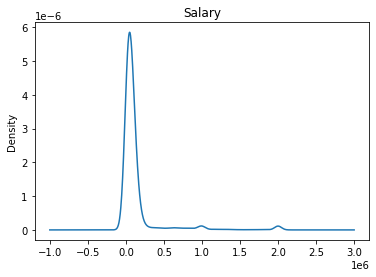

In [5]:
# your code goes here
df['ConvertedComp'].plot(kind = 'kde')
plt.title('Salary')

Plot the histogram for the column `ConvertedComp`.


Text(0.5, 1.0, 'Salary')

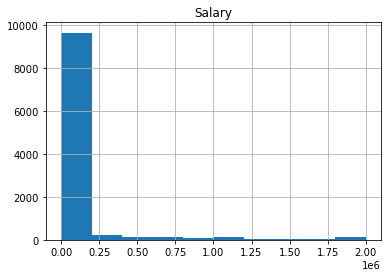

In [6]:
# your code goes here
df['ConvertedComp'].hist()
plt.title('Salary')

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
(df['Gender'] == 'Man').sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [32]:
# your code goes here
dfwoman = df[df['Gender']=='Woman'] 
dfwoman['ConvertedComp'].median()

57708.0

In [10]:
print(df['Gender'].tolist().count('Woman'))

731


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
print('Min is = {}'.format(df['Age'].min()))
print('q1 is = {}'.format(np.nanpercentile(df['Age'], 25)))
print('Median is = {}'.format(df['Age'].median()))
print('q2 is = {}'.format(np.nanpercentile(df['Age'], 75)))
print('Max is = {}'.format(df['Age'].max()))

Min is = 16.0
q1 is = 25.0
Median is = 29.0
q2 is = 35.0
Max is = 99.0


In [13]:
print('q1 is = {}'.format(df['Age'].quantile(q=0.25)))

q1 is = 25.0


Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Age')

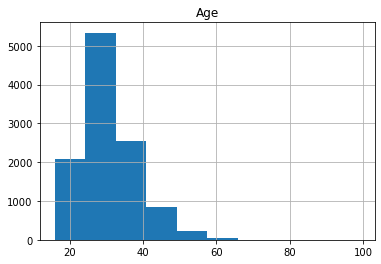

In [14]:
# your code goes here
df['Age'].hist()
plt.title('Age')

Text(0.5, 0, 'Age')

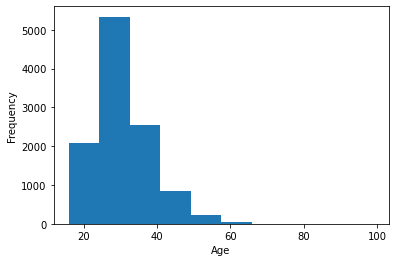

In [15]:
df['Age'].plot(kind = 'hist')
plt.xlabel('Age')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 0, 'ConvertedComp')

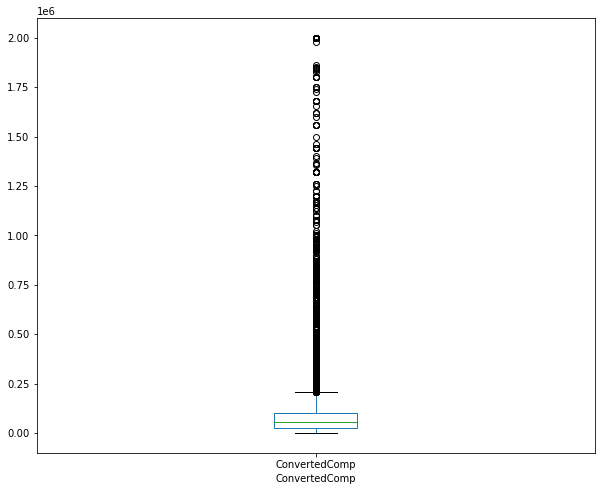

In [18]:
# your code goes here
plt.figure(figsize = (10, 8))
df['ConvertedComp'].plot(kind = 'box')
plt.xlabel('ConvertedComp')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:
# your code goes here
iqr = np.nanpercentile(df['ConvertedComp'], 75) - np.nanpercentile(df['ConvertedComp'], 25)
print('Interquartile range of ConvertedComp = ', iqr)

Interquartile range of ConvertedComp =  73132.0


In [21]:
iqr = df['ConvertedComp'].quantile(q=0.75)-df['ConvertedComp'].quantile(q=0.25)
print('Interquartile range of ConvertedComp = ', iqr)

Interquartile range of ConvertedComp =  73132.0


Find out the upper and lower bounds.


In [24]:
# your code goes here
upper = df['ConvertedComp'].quantile(q=0.75)+1.5*iqr
lower = df['ConvertedComp'].quantile(q=0.25)-1.5*iqr
print('Upper bound = {}, Lower bound = {}'.format(upper, lower))

Upper bound = 209698.0, Lower bound = -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [45]:
# your code goes here
outliers = ((df['ConvertedComp']>upper) | (df['ConvertedComp']<lower)).sum()
outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [48]:
# your code goes here
df = df[(df['ConvertedComp'] <= upper) & (df['ConvertedComp'] >= lower)]
df['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [47]:
# your code goes here
df.corr()['Age']

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
